In [125]:
#importing the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [126]:
#importing the dataset from csv file
df=pd.read_csv("Data/Titanic-Dataset.csv")

In [127]:
#removing all not important columns and copying it to new data frame
impove_df=df.drop(columns=["Cabin","Embarked","Ticket"]).copy()


In [ ]:
# create a new column to classify each passenger as 'child' (age ≤ 12) or 'adult' (age > 12)
impove_df["PersonType"]=impove_df.Age.apply(lambda age: "child" if age<=12 else "adult")

In [129]:
#filling the missing age with median age
age_median=impove_df.Age.median()
impove_df["Age"]=impove_df.Age.fillna(value=age_median)

In [130]:
# creating separate DataFrames for passengers who survived and those who did not 
survied_df=impove_df[impove_df.Survived==1]
died_df=impove_df[impove_df.Survived==0]


In [131]:
# counting the number of survivors and non-survivors in each passenger class and merging the results into a single DataFrame
survied_and_died_by_Pclass=survied_df.groupby("Pclass")["Survived"].count().to_frame()
died_df_pivoit_table=died_df.groupby("Pclass")["Survived"].count().to_frame().rename(columns={"Survived":"Not Survived"})
survied_and_died_by_Pclass=survied_and_died_by_Pclass.merge(died_df_pivoit_table,on=survied_and_died_by_Pclass.index).rename(columns={"key_0":"Pclass"}).set_index("Pclass")

In [132]:
# calculate total passengers, survived percentage, and not survived percentage for each passenger class
survied_and_died_by_Pclass["total"]=survied_and_died_by_Pclass["Survived"]+survied_and_died_by_Pclass["Not Survived"]
survied_and_died_by_Pclass["Survived percentage"]=(survied_and_died_by_Pclass["Survived"]/survied_and_died_by_Pclass["total"]*100).round(2)
survied_and_died_by_Pclass["Not Survived percentage"]=(survied_and_died_by_Pclass["Not Survived"]/survied_and_died_by_Pclass["total"]*100).round(2)
survied_and_died_by_Pclass

,Survived,Not Survived,total,Survived percentage,Not Survived percentage
Pclass,,,,,
1,136,80,216,62.96,37.04
2,87,97,184,47.28,52.72
3,119,372,491,24.24,75.76


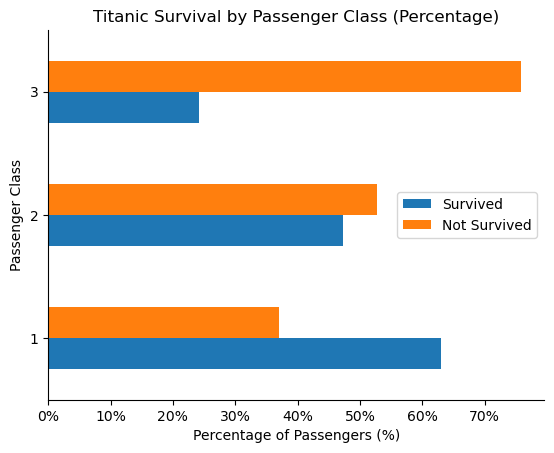

In [133]:
#ploting the dataframe
survied_and_died_by_Pclass.plot(kind="barh",y=["Survived percentage","Not Survived percentage"],label=["Survived","Not Survived"])
plt.xlabel("Percentage of Passengers (%)")
plt.ylabel("Passenger Class")
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"{x:.0f}%"))
plt.title("Titanic Survival by Passenger Class (Percentage)")
sns.despine()

From the above graph we can say that survival chances on the Titanic strongly depended on passenger class:

1) 1st class passengers had the best chance of survival.

2) 2nd class passengers had a moderate chance.

3) 3rd class passengers had the lowest survival rate, with most perishing.

This reflects the social and economic disparities in access to lifeboats and rescue opportunities.

In [134]:
# counting the number of survivors and non-survivors according to the gender and merging the results into a single DataFrame
survied_and_died_by_gender=survied_df.Sex.value_counts().to_frame().rename(columns={"count":"Survived"}).reset_index()
died_df_pivoit_table=died_df.Sex.value_counts().to_frame().rename(columns={"count":"Not Survived"}).reset_index()
survied_and_died_by_gender=survied_and_died_by_gender.merge(died_df_pivoit_table,on="Sex").rename(columns={"Sex":"Gender"}).set_index("Gender")

In [135]:
# calculate total passengers, survived percentage, and not survived percentage for passenger gender
survied_and_died_by_gender["total"]=survied_and_died_by_gender["Survived"]+survied_and_died_by_gender["Not Survived"]
survied_and_died_by_gender["Survived percentage"]=(survied_and_died_by_gender["Survived"]/survied_and_died_by_gender["total"]*100).round(2)
survied_and_died_by_gender["Not Survived percentage"]=(survied_and_died_by_gender["Not Survived"]/survied_and_died_by_gender["total"]*100).round(2)
survied_and_died_by_gender

,Survived,Not Survived,total,Survived percentage,Not Survived percentage
Gender,,,,,
female,233,81,314,74.20,25.80
male,109,468,577,18.89,81.11


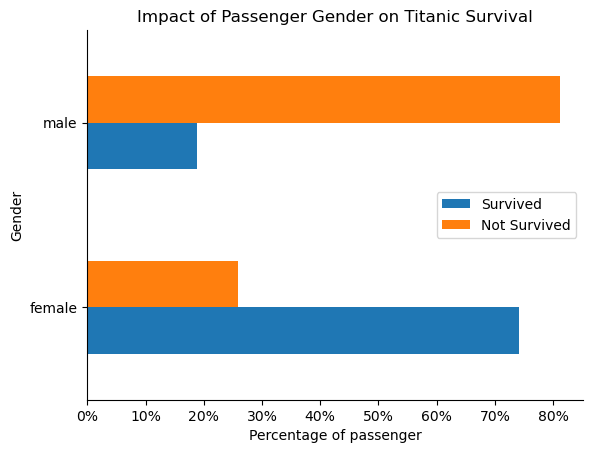

In [136]:
#ploting the graph
survied_and_died_by_gender.plot(kind="barh",y=["Survived percentage","Not Survived percentage"],label=["Survived","Not Survived"])
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"{x:.0f}%"))
plt.xlabel("Percentage of passenger")
plt.title("Impact of Passenger Gender on Titanic Survival")
sns.despine()

From the above graph we can say that:

1) Survival chances on the Titanic strongly depended on passenger gender:

2) Percentage of male passanger who did not survived were more than the number of female passanger 

This reflects the "women and children first" evacuation policy, where females were given higher priority for lifeboats and rescue opportunities.

In [137]:
# counting the number of survivors and non-survivors according to the person type and merging the results into a single DataFrame
survied_and_died_by_PersonType=survied_df.PersonType.value_counts().to_frame().rename(columns={"count":"Survived"}).reset_index()
died_df_pivoit_table=died_df.PersonType.value_counts().to_frame().rename(columns={"count":"Not Survived"}).reset_index()
survied_and_died_by_PersonType=survied_and_died_by_PersonType.merge(died_df_pivoit_table,on="PersonType").set_index("PersonType")


In [138]:
# calculate total passengers, survived percentage, and not survived percentage for passenger gender
survied_and_died_by_PersonType["total"]=survied_and_died_by_PersonType["Survived"]+survied_and_died_by_PersonType["Not Survived"]
survied_and_died_by_PersonType["Survived percentage"]=(survied_and_died_by_PersonType["Survived"]/survied_and_died_by_PersonType["total"]*100).round(2)
survied_and_died_by_PersonType["Not Survived percentage"]=(survied_and_died_by_PersonType["Not Survived"]/survied_and_died_by_PersonType["total"]*100).round(2)
survied_and_died_by_PersonType

,Survived,Not Survived,total,Survived percentage,Not Survived percentage
PersonType,,,,,
adult,302,520,822,36.74,63.26
child,40,29,69,57.97,42.03


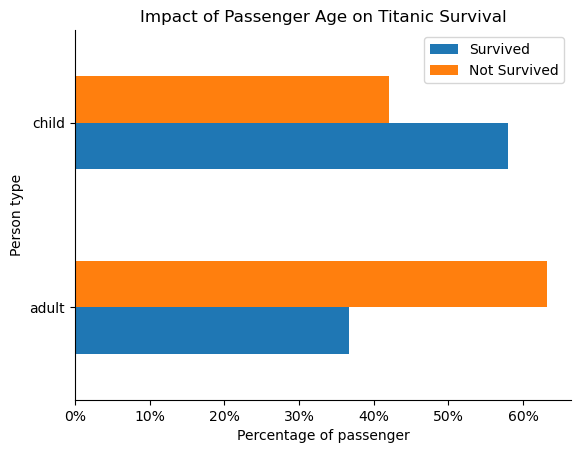

In [139]:
#ploting the graph
survied_and_died_by_PersonType.plot(kind="barh",y=["Survived percentage","Not Survived percentage"],label=["Survived","Not Survived"])
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"{x:.0f}%"))
plt.xlabel("Percentage of passenger")
plt.ylabel("Person type")
plt.title("Impact of Passenger Age on Titanic Survival")
sns.despine()

From the above graph we can say that

1) Percentage of childen survied is more compared to the childen who did not.

2) This shows the "women and children first" evacuation policy, where childen were given higher priority for lifeboats and rescue opportunities.



In [140]:
#removing the column which are not needed for the logictic regression
impove_df=impove_df.drop(columns=["Name","SibSp","Parch","Fare","PersonType","PassengerId"])

In [141]:
# Encode 'Sex' column: male → 1, female → 0 (for use in logictic regression)
impove_df["Sex"]=impove_df.Sex.apply(lambda Sex: 1 if Sex=="male" else 0)


In [142]:
impove_df

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0
...,...,...,...,...
886,0,2,1,27.0
887,1,1,0,19.0
888,0,3,0,28.0
889,1,1,1,26.0


In [143]:
#impove_df.to_csv("Data/impove_dataset.csv",index_label=False)